In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df=pd.read_excel("/home/ubuntu/Downloads/StudentsPerformance.xlsx")
df.head()
df.info()
df.describe()
df.shape



ModuleNotFoundError: No module named 'seaborn'

In [3]:
!pip3 install matplotlib

In [5]:
!pip install seaborn

     |████████████████████████████████| 294 kB 12.3 MB/s eta 0:00:01


In [6]:
!pip install scipy


In [7]:
!pip install scikit-learn


In [8]:
!pip install matplotlib seaborn scipy scikit-learn



    Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date  \
0         70.0           82.0           79.0             78.0            2019   
1         72.0            NaN           73.0             99.0            2019   
2         77.0           90.0           60.0             88.0            2021   
3         62.0           80.0           68.0             79.0            2018   
4         76.0           95.0            NaN             81.0            2019   
5         65.0           81.0           63.0             84.0            2018   
6         62.0           92.0           62.0              NaN            2019   
7         72.0           80.0           77.0             75.0            2021   
8         77.0           76.0           70.0             78.0            2021   
9         61.0           77.0           69.0             88.0            2021   
10        76.0           85.0           79.0             98.0            2018   
11        63.0           89.

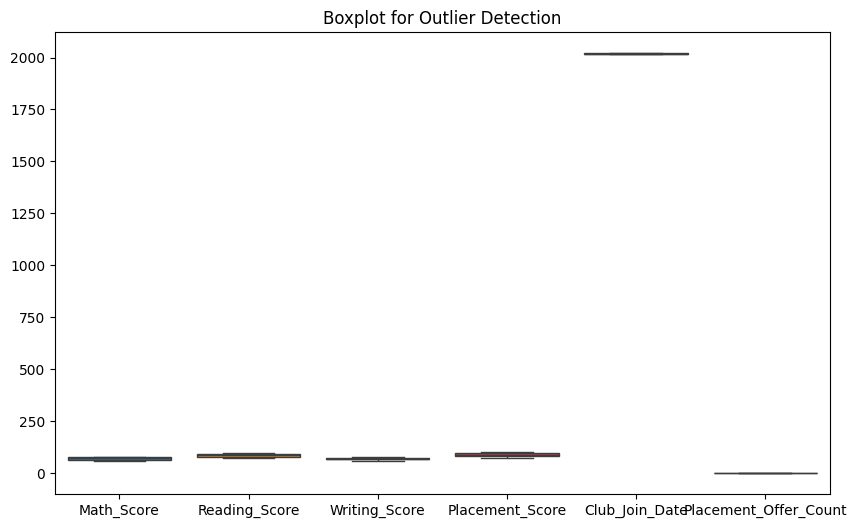

Outliers using Z-score:
 Math_Score               0
Reading_Score            0
Writing_Score            0
Placement_Score          0
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64


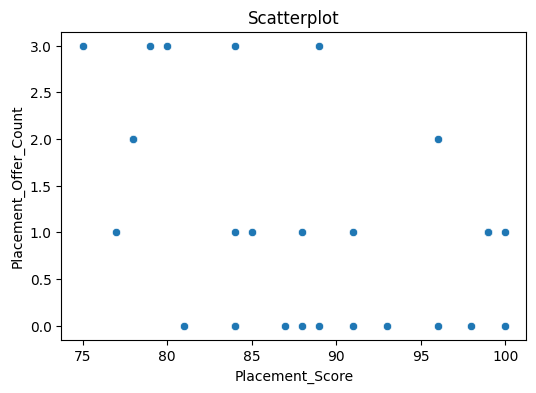

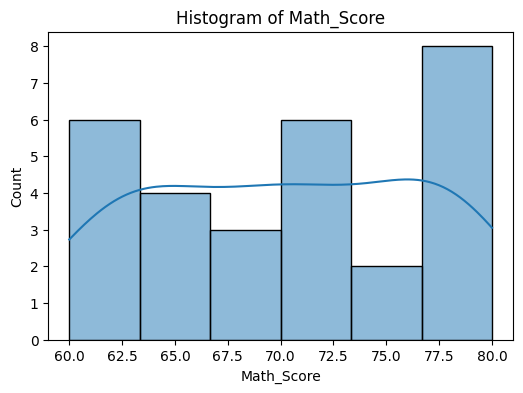

Skewness of Math_Score:  -0.04341982394837113


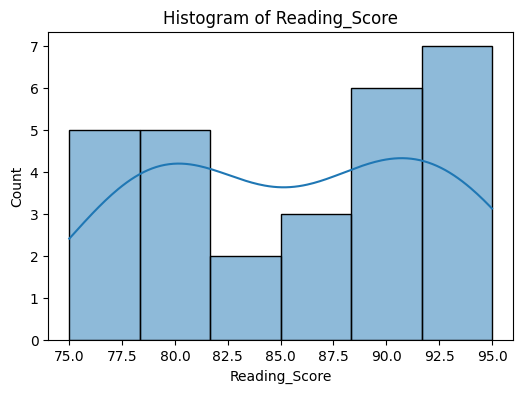

Skewness of Reading_Score:  -0.03592906875798331


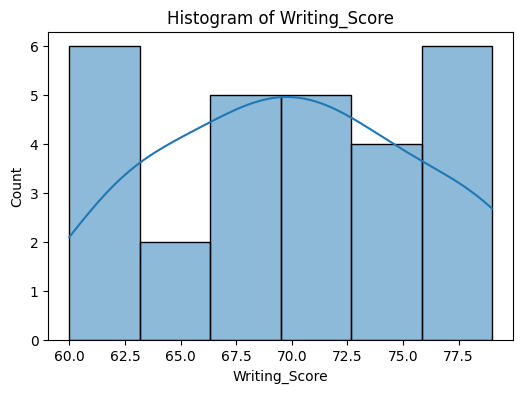

Skewness of Writing_Score:  0.05797322227436802


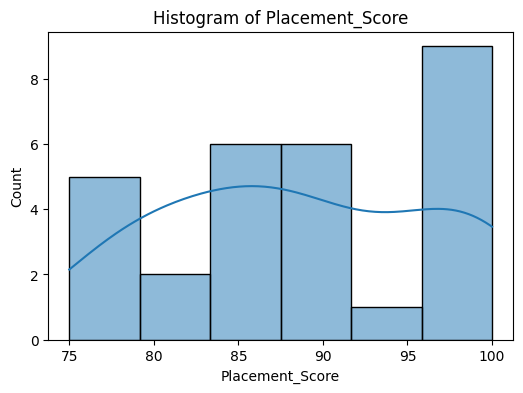

Skewness of Placement_Score:  0.004612057223273767


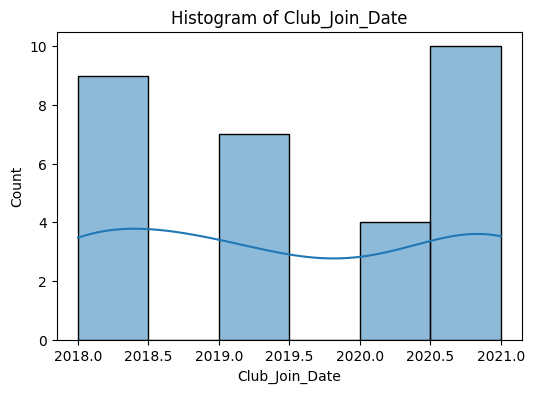

Skewness of Club_Join_Date:  0.05639834788157418


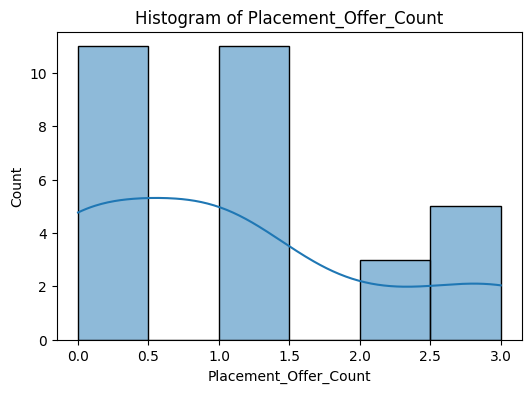

Skewness of Placement_Offer_Count:  0.7382617296219913


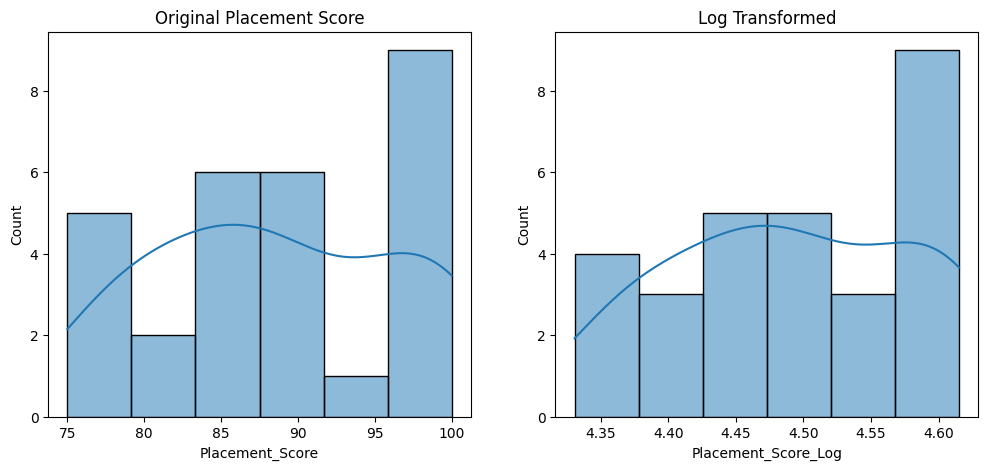

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df=pd.read_excel("/home/ubuntu/Downloads/StudentsPerformance.xlsx")
print(df)
print(df.info())
print(df.describe())
print(df.shape)

#handling missing values
print("\nNumber of missing values in each row:")
print(df.isnull().sum())


#mean imputation
df_mean = df.copy()
df_mean.fillna(df_mean.mean(numeric_only=True), inplace=True)

print("Mean Imputation Output:")
print(df_mean.head())


#median imputation
df_median = df.copy()
df_median.fillna(df_median.median(numeric_only=True), inplace=True)

print("\nMedian Imputation Output:")
print(df_median.head())


#detecting outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot for Outlier Detection")
plt.show()

# using z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3)
print("Outliers using Z-score:\n", outliers.sum())

#scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Placement_Score", y="Placement_Offer_Count", data=df)
plt.title("Scatterplot")
plt.show()

#replacing outliers with median
df_median_out = df.copy()

#IQR method
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound
for col in df_median_out.select_dtypes(include=np.number).columns:
    lower, upper = detect_outliers_iqr(col)
    median = df_median_out[col].median()
    df_median_out[col] = np.where(
        (df_median_out[col] < lower) | (df_median_out[col] > upper),
        median,
        df_median_out[col]
    )
    
#min-max normalization
scaler = MinMaxScaler()
df_minmax = df.copy()

df_minmax[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(
    df.select_dtypes(include=np.number)
)
df_minmax.head()


#histogram for skewness detection
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()
    
    print(f"Skewness of {col}: ", df[col].skew())

#histogram to reduce skewness
df["Placement_Score_Log"] = np.log1p(df["Placement_Score"])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Placement_Score"], kde=True)
plt.title("Original Placement Score")

plt.subplot(1,2,2)
sns.histplot(df["Placement_Score_Log"], kde=True)
plt.title("Log Transformed")

plt.show()


